In [69]:
import torch.nn.functional as F
from torch.utils import data
import torch
import os
import random
import numpy as np

data = np.load( "CRP128-small.npy" )
print(data.shape)
data = np.random.permutation(data)

sample=64
pixels=sample*501

if sample<128:
        data = data.transpose(2,1,0,3)
        data = np.random.permutation(data)
        data = data[0:sample]
        print(data.shape)
        data = data.transpose(2,1,0,3)
        print(data.shape)

data = torch.from_numpy(np.stack(data, 0))
data = data.float()
print(data.dtype)

X= data.reshape(16*504*sample, 204)
print(X.shape)

X_mean = torch.mean(X,dim=0,keepdim=True)

#X_mean = np.transpose(X_mean,(1, 0))
print(X_mean.shape)
#print(X_mean)

X_mean = X_mean.reshape(1,1,204)
print(X_mean.shape)

indice1 = 300
#indice2 = int(data.shape[0]*0.81)
#indice3 = int(data.shape[0]*0.01)
indice4 = len(data)
print(indice1)
#print(indice2)
#print(indice3)
print(indice4)

train = data[0:indice1]
valid = data[indice1:(indice1+100)]
test = data[(indice4-100):indice4]

print(train.shape)
print(valid.shape)
print(test.shape)
print(train.dtype)

#train = train.view(-1, 64, 204)
#valid = valid.view(-1, 64, 204)
#test = test.view(-1, 64, 204)
train = torch.reshape(train,(-1, sample, 204))
valid = torch.reshape(valid,(-1, sample, 204))
test = torch.reshape(test,(-1, sample, 204))
#train = torch.reshape(train,(indice1*16, 64, 204))
#valid = torch.reshape(valid,(indice3*16, 64, 204))
#test = torch.reshape(test,(indice4*16, 64, 204))

#X_mean = F.avg_pool1d(X_mean,kernel_size=2)
#print(X_mean.shape)

x = train
print(x.shape)
#mean = torch.mean(x,dim=1,keepdim=True)
temp = (x - X_mean.repeat(x.size(0),x.size(1),1))        
temp = temp * temp
w = F.adaptive_avg_pool1d(temp,[1])
print(w.shape)
w, idx = torch.sort(w, dim=1, descending=True)
b,c,_ = x.size()
train = torch.zeros_like(x)
idx = idx[:,:]
for i in range(b):
        for j in range(c):
                train[i][j][:] = x[i][idx[i][j]][:]

#print(train.shape)
#X_mean1=X_mean.repeat(x.size(0),1,1)
#print(X_mean1.shape)
#train = torch.cat([train, X_mean1], 1)
#print(train.shape)

x = test
#mean = torch.mean(x,dim=1,keepdim=True)
temp = (x - X_mean.repeat(x.size(0),x.size(1),1))   
temp = temp * temp
w = F.adaptive_avg_pool1d(temp,[1])
#        print(w.shape)
w, idx = torch.sort(w, dim=1, descending=True)
b,c,_ = x.size()
test = torch.zeros_like(x)
idx = idx[:,:]
for i in range(b):
        for j in range(c):
                test[i][j][:] = x[i][idx[i][j]][:]

x = valid
#mean = torch.mean(x,dim=1,keepdim=True)
temp = (x - X_mean.repeat(x.size(0),x.size(1),1))   
temp = temp * temp
w = F.adaptive_avg_pool1d(temp,[1])
#        print(w.shape)
w, idx = torch.sort(w, dim=1, descending=True)
b,c,_ = x.size()
valid = torch.zeros_like(x)
idx = idx[:,:]
for i in range(b):
        for j in range(c):
                valid[i][j][:] = x[i][idx[i][j]][:]


print(train.shape)
print(valid.shape)
print(test.shape)

np.save("train.npy", train)
np.save("test.npy", test)
np.save("valid.npy", valid)


(504, 16, 128, 204)
(64, 16, 504, 204)
(504, 16, 64, 204)
torch.float32
torch.Size([516096, 204])
torch.Size([1, 204])
torch.Size([1, 1, 204])
300
504
torch.Size([300, 16, 64, 204])
torch.Size([100, 16, 64, 204])
torch.Size([100, 16, 64, 204])
torch.float32
torch.Size([4800, 64, 204])
torch.Size([4800, 64, 1])
torch.Size([4800, 64, 204])
torch.Size([1600, 64, 204])
torch.Size([1600, 64, 204])


In [70]:
import torch.nn.functional as F
from torch.utils import data
import torch
import os
import random
import numpy as np

indice1 = 300

#sample=32
p=sample

train = np.load("train.npy")
train = torch.from_numpy(np.stack(train, 0))
#train, mean1=train.split([p,1],dim=1)
#train, t = train.reshape(train.size(0),p,4,204).split([1,3],dim=2)
#train=train.squeeze()
test = np.load("test.npy")
test = torch.from_numpy(np.stack(test, 0))
#test, mean1=test.split([p,1],dim=1)
#test, t = test.reshape(test.size(0),p,4,204).split([1,3],dim=2)
#test = test.squeeze()
valid = np.load("valid.npy")
valid = torch.from_numpy(np.stack(valid, 0))
#valid, t = valid.reshape(valid.size(0),p,4,204).split([1,3],dim=2)
#valid = valid.squeeze()

print(train.shape)
print(valid.shape)
print(test.shape)

label=np.arange(0,16,1)
label = label.astype(np.float32)
#train_label=np.repeat(label, 15929)
train_label = torch.from_numpy(np.tile(label, indice1)) 
valid_label = torch.from_numpy(np.tile(label, 100))
test_label  = torch.from_numpy(np.tile(label, 100))

print(train_label.dtype)
print(train_label.shape)
print(valid_label.shape)
print(test_label.shape)


from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.autograd import Variable

train_dataset = TensorDataset(train, train_label)
valid_dataset = TensorDataset(valid, valid_label)
test_dataset = TensorDataset(test, test_label)
batch=32

train_loader = DataLoader(
    dataset = train_dataset,
    batch_size = batch,             # 每批提取的数量
    shuffle= True,             # 要不要打乱数据
)

valid_loader = DataLoader(
    dataset = valid_dataset,
    batch_size = batch,             # 每批提取的数量
    shuffle= True,             # 要不要打乱数据
)

test_loader = DataLoader(
    dataset = test_dataset,
    batch_size = batch,             # 每批提取的数量
    shuffle= True,             # 要不要打乱数据
)

torch.Size([4800, 64, 204])
torch.Size([1600, 64, 204])
torch.Size([1600, 64, 204])
torch.float32
torch.Size([4800])
torch.Size([1600])
torch.Size([1600])


In [4]:
X_mean = np.mean(data.reshape(16, 504*64, 204), axis=1)

#X_mean = np.transpose(X_mean,(1, 0))
print(X_mean.shape)
print(X_mean)

(16, 204)
[[0.17773023 0.1540706  0.13846298 ... 0.68774843 0.6945025  0.5035027 ]
 [0.28483608 0.276251   0.27301055 ... 0.68829143 0.6910048  0.53971416]
 [0.0910029  0.0803828  0.07367416 ... 0.610564   0.60874164 0.414551  ]
 ...
 [0.21044257 0.1892421  0.17541607 ... 0.729948   0.7280562  0.5501725 ]
 [0.17395425 0.1480011  0.13030659 ... 0.7897932  0.7972914  0.5994582 ]
 [0.21007484 0.19028847 0.17791335 ... 0.78042203 0.7772099  0.5805029 ]]


In [92]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import argparse

from torch.autograd import Variable
import torch.optim as optim
#from torch.cuda.amp import autocast
#from tensorboardX import SummaryWriter

parser = argparse.ArgumentParser(description='Sequence Modeling')
parser.add_argument('--batch_size', type=int, default=32, metavar='N',
                    help='batch size (default: 128)')
parser.add_argument('--cuda', action='store_true', default=False,
                    help='Disable cuda for training')
parser.add_argument('--dropout', type=float, default=0.45,
                    help='dropout applied to layers (default: 0.05)')
parser.add_argument('--clip', type=float, default=0.35,
                    help='gradient clip, -1 means no clip (default: -1)')
parser.add_argument('--epochs', type=int, default=20,
                    help='upper epoch limit (default: 20)')
#parser.add_argument('--ksize', type=int, default=3,
#                    help='kernel size (default: 7)')
parser.add_argument('--levels', type=int, default=4,
                    help='# of levels (default: 8)')
parser.add_argument('--log-interval', type=int, default=1, metavar='N',
                    help='report interval (default: 100')
parser.add_argument('--lr', type=float, default=1e-4,
                    help='initial learning rate (default: 2e-3)')
parser.add_argument('--optim', type=str, default='Adam',
                    help='optimizer to use (default: Adam)')
#parser.add_argument('--nhid', type=int, default=128,
#                    help='number of hidden units per layer (default: 25)')
parser.add_argument('--seed', type=int, default=1111,
                    help='random seed (default: 1111)')
parser.add_argument('--seq_len', type=int, default=204)

args = parser.parse_args([])

if torch.cuda.is_available():
    if not args.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")
print(args)

torch.manual_seed(args.seed)
batch_size = args.batch_size  #8
epochs = args.epochs  #25
input_channels = sample
channel_sizes = [input_channels*2] * args.levels   #[ ]*4
n_classes = 16
steps = 0


import math
from einops import rearrange
from torch.nn import init
from torch.nn.utils import weight_norm

class MUSEAttention(nn.Module):

    def __init__(self, p=32, d_model=204, d_k=17*2, h=3, k=5, dropout=.1):

        super(MUSEAttention, self).__init__()
        self.fc_q = nn.Linear(d_model, h * d_k)
        self.fc_k = nn.Linear(d_model, h * d_k)
        self.fc_v = nn.Linear(d_model, h * d_k)
#        self.fc_o = nn.Linear(h * d_v, h * d_v)
#        self.dropout=nn.Dropout(dropout)

#        self.dy_paras=nn.Parameter(torch.ones(4))
        self.softmax=nn.Softmax(-1)

        self.d_model = d_model
        self.d_k = d_k
        self.d_v = d_k
        self.h = h

        self.init_weights()

#        self.l = nn.Linear(d_model, d_model)
        self.c = nn.Conv1d(p, p, kernel_size=k,stride=1, padding=2, groups=p)
#        self.gelu1=nn.GELU()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.normal_(m.weight, std=0.001)
                if m.bias is not None:
                    init.constant_(m.bias, 0)

    def forward(self, x, attention_mask=None, attention_weights=None):
#        q =self.fc_q(x)
#        kv =self.fc_k(x)
#        kv = torch.split(kv, [32, 32], dim=1)
#        print("x:",x.shape)
        b, c, l = x.shape #(16, 102, 128)

        q = self.fc_q(x).view(b, c, self.h, self.d_k).permute(0, 2, 1, 3)  # (b_s, h, nq, d_k)
#        print("q:",q.shape)
        k = self.fc_k(x).view(b, c, self.h, self.d_k).permute(0, 2, 3, 1)  # (b_s, h, d_k, nk)
#        print("k:",k.shape)
        v = self.fc_v(x).view(b, c, self.h, self.d_v).permute(0, 2, 1, 3)  # (b_s, h, nk, d_v)

#        k,v=map(lambda t:rearrange(t,'b c (h l) -> b h c l',h=self.h),kv)
#        q = q.view(b, c, self.h, self.d_k).permute(0, 2, 1, 3)  # (b_s, h, nq, d_k)
#        print("q:",q.shape)
#        k = k.permute(0, 1, 3, 2)  # (b_s, h, d_k, nk)

        att = torch.matmul(q, k) / np.sqrt(self.d_k)  # (b_s, h, nq, nk)
#        print("att1:",att.shape)
        if attention_weights is not None:
            att = att * attention_weights
#            print("att2:",att.shape)

        att = torch.softmax(att, dim=1)
#        print("att4:",att.shape)
#        att=self.dropout(att)
#        print("att5:",att.shape)
        att = torch.matmul(att, v).permute(0, 2, 1, 3).contiguous().view(b, c, self.h * self.d_v) # (b_s, nq, h*d_v)
#        print("att:",att.shape)
#        att = self.fc_o(att)  # (b_s, nq, d_model)
#        v = v.permute(0, 1, 3, 2).contiguous().view(b, self.h * self.d_v, c)
        v = v.permute(0, 2, 1, 3).contiguous().view(b, c, self.h * self.d_v)
#        print("v:",v.shape)        
        dw = self.c(v)
        out_att = att+dw
#        print("out:",out.shape)
        return out_att

class TemporalConvNet(nn.Module):
    def __init__(self, p=16, l=204):
        super(TemporalConvNet, self).__init__()

        self.tconv1 = weight_norm(nn.Conv1d(p, p, kernel_size=3,stride=1, padding=1, groups=1))
        self.relu1 = nn.GELU()
        self.tconv2 = weight_norm(nn.Conv1d(p, p, kernel_size=5,stride=1, padding=2*2, dilation=2, groups=1))
 #       self.relu2 = nn.GELU()
        self.relu2 = nn.GELU()
        self.tconv3 = weight_norm(nn.Conv1d(p, p, kernel_size=7,stride=1, padding=4*3, dilation=4, groups=1))
        self.relu3 = nn.GELU()
#        self.tconv4 = weight_norm(nn.Conv1d(l, l, kernel_size=k,stride=1, padding=2*8, dilation=8, groups=1))
#        self.relu4 = nn.GELU()
        self.ln0 = nn.LayerNorm([p,l],elementwise_affine = True)
        self.init_weights()

        self.attention = MUSEAttention(p,l,l//3)
 
        self.resweight = nn.Parameter(torch.Tensor([0]))
        self.resweight1 = nn.Parameter(torch.Tensor([0]))
#        self.dropout2 = nn.Dropout(0.1)
        
        self.ln = nn.LayerNorm([p,l],elementwise_affine = True)

#        self.ln1 = nn.LayerNorm([num_inputs*2,51],elementwise_affine = True)
#        self.pointwise_conv=nn.Conv1d(num_inputs*2, num_inputs*2, 1)
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()

    def init_weights(self):
        self.tconv1.weight.data.normal_(0, 0.01)
        self.tconv2.weight.data.normal_(0, 0.01)
        self.tconv3.weight.data.normal_(0, 0.01)
#        self.tconv4.weight.data.normal_(0, 0.01)


    def forward(self, x):
#        out,out_tcn= self.network(x)

        out_tcn1 = self.relu1(self.tconv1(x))
        out_tcn2 = self.relu2(self.tconv2(out_tcn1))
        out_tcn = self.ln0(self.relu3(self.tconv3(out_tcn2)))
#        out_tcn = self.relu4(self.ln0(self.tconv4(out_tcn)))
#        print(out_tcn.shape)
#        weight = self.tconv3.weight.clone()
#        print(weight.shape)       
        out_att = self.attention(out_tcn)
#        print(out_att.shape)        
        out = self.resweight*out_tcn + out_att
#        out2 = self.pointwise_conv(self.ln(out1))

        out = self.ln(out + self.resweight1*x)
        out =  self.relu(self.dropout(out))

        return out
#        return out,out_tcn1,out_tcn2,out_tcn,out_att

class TCN(nn.Module):
    def __init__(self, input_size, output_size,p,l=51):
        super(TCN, self).__init__()
           
#        self.avgpool = nn.AvgPool1d(kernel_size=2)
#        self.weight = ChannelAttention()
        self.length=l
        self.tcn = TemporalConvNet(p,l)
        self.linear = nn.Linear(l*4, output_size)
#        self.ca = nn.Conv1d(l, l, kernel_size=51, groups=l)
#        self.sigmoid = nn.Sigmoid()
#        self.ini = nn.Conv1d(l, l, kernel_size=1)

        self.l1 = nn.Linear(input_size, p)
        self.gelu1=nn.GELU()
        self.l2=nn.Linear(204, l)
        self.gelu2=nn.GELU()        
        self.ln = nn.LayerNorm([p,l],elementwise_affine = True)

    def forward(self, x):
#        x = self.avgpool(inputs)
        """Inputs have to have dimension (N, C_in, L_in)"""
#        x, mean=x.split([64,1],dim=1)
#        print(x.shape)
        x = x.permute(0,2,1)
        x = self.gelu1(self.l1(x))
        x = x.permute(0,2,1)
        x = self.gelu2(self.ln(self.l2(x))) 
#        out,out_tcn1,out_tcn2,out_tcn,out_att= self.tcn(x)  # input should have dimension (N, C, L)
        out= self.tcn(x)
#        print(out_tcn.shape)
#        out_tcn = torch.cat((x, out3), dim=1)
#        out_tcn = shuffle(out_tcn, 2)

        y2 = F.adaptive_avg_pool2d(out.permute(0, 2, 1), [self.length,4])
        y3 = y2.view(y2.size(0), -1)
        o = self.linear(y3)

#        o = self.linear(out_tcn[:, :,-1])
#        print(y2.shape)
        o = F.log_softmax(o, dim=1).contiguous()
#        print(o)
#        return o,out,out_tcn1,out_tcn2,out_tcn,out_att
        return o

Namespace(batch_size=32, cuda=False, dropout=0.45, clip=0.35, epochs=20, levels=4, log_interval=1, lr=0.0001, optim='Adam', seed=1111, seq_len=204)


In [93]:
from torchsummary import summary
#from pytorch_model_summary import summary

model = TCN(input_channels, n_classes, (32//4)*4, 51*4)
if args.cuda:
    model.cuda()

#writer = SummaryWriter("runs")

summary(model, input_size=[(input_channels, 204)], batch_size=32)

model.state_dict()
for p in model.named_parameters():
    print(p)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print('parameters_count:',count_parameters(model))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [32, 204, 32]           1,056
              GELU-2              [32, 204, 32]               0
            Linear-3              [32, 32, 204]          41,820
         LayerNorm-4              [32, 32, 204]          13,056
              GELU-5              [32, 32, 204]               0
            Conv1d-6              [32, 32, 204]           3,104
              GELU-7              [32, 32, 204]               0
            Conv1d-8              [32, 32, 204]           5,152
              GELU-9              [32, 32, 204]               0
           Conv1d-10              [32, 32, 204]           7,200
             GELU-11              [32, 32, 204]               0
        LayerNorm-12              [32, 32, 204]          13,056
           Linear-13              [32, 32, 204]          41,820
           Linear-14              [32, 

In [94]:
import time
import torch
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity
import torch
import torchvision
from ptflops import get_model_complexity_info
from torch.backends import cudnn
import tqdm
import numpy as np

optimal_batch_size=32
Channel=input_channels

dump_input = torch.randn(optimal_batch_size, Channel, 204)

    # Warn-up
curr_time = 0
repetitions = 1000
for _ in range(repetitions):
    start = time.time()
    outputs = model(dump_input)
#        torch.cuda.synchronize()
    end = time.time()
    t = end-start
    curr_time = curr_time + t
#time_avg= (curr_time*1000)//repetitions//32
#print('Time:{}ms'.format(time_avg))
print('Time:{}'.format(np.round((curr_time), 2)))

#with profile(activities=[ProfilerActivity.CPU], profile_memory=True, record_shapes=True) as prof:
#    with record_function("model_inference"):
#        model(dump_input)
#print(prof.key_averages().table(sort_by="self_cpu_time_total"))
#    print(prof.key_averages())
#print(prof.table())
#print(prof.key_averages(group_by_input_shape=True))
#prof.export_chrome_trace('./profile.json')

macs, params = get_model_complexity_info(model, (Channel, 204), as_strings=True,print_per_layer_stat=False, verbose=True)
#print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
#print('{:<30}  {:<8}'.format('Number of parameters: ', params))
#print(' FLOPs: ', macs*2)   # 一般来讲，FLOPs是macs的两倍
#print('params: ', params)
print("|%s |%s" % (macs,params))

Time:7.39
|8.77 MMac |223.27 k


In [57]:
import torchmetrics
from sklearn.metrics import confusion_matrix

#criterion = nn.CrossEntropyLoss()
lr = args.lr
optimizer = getattr(optim, args.optim)(model.parameters(), lr=lr)

losses = []
loss_test = []
accuracy = []
precision = []
recall = []
F1 = []
jaccard = []
fm = []
#AUC = []
atts= []

acc_valid = []

#seq_length=204//4

def train(ep):
#    global steps
    train_loss = 0
    model.train()
    for batch_idx, (bands, target) in enumerate(train_loader):
 #       if args.cuda: bands, target = bands.cuda(), target.cuda()
        #bands = bands.view(-1, input_channels, seq_length)
        bands, target = Variable(bands), Variable(target)
        optimizer.zero_grad()
        output = model(bands)
#        output,_,_,_,_,_= model(bands)
        loss = F.nll_loss(output, target.long())
        loss.backward()
        if args.clip > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        optimizer.step()
        train_loss += loss
#        steps += seq_length
        if batch_idx % args.log_interval == 0:
            los = train_loss.item()/args.log_interval
            losses.append(los)
#            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tSteps: {}'.format(
#                ep, batch_idx * batch_size, len(train_loader.dataset),
#                100. * batch_idx / len(train_loader), train_loss.item()/args.log_interval, steps))
            train_loss = 0

def test(loader):
    model.eval()
#    device = torch.device("cuda")
    test_acc = torchmetrics.Accuracy()
#    test_recall = torchmetrics.Recall(average='macro', num_classes=16)
#    test_precision = torchmetrics.Precision(average='macro', num_classes=16)
#    test_F1 = torchmetrics.F1Score(average='macro', num_classes=16)
#    test_jaccard = torchmetrics.JaccardIndex(average='macro', num_classes=16)
    test_fm = torchmetrics.ConfusionMatrix(threshold=1./16,num_classes=16)
#    test_auc = torchmetrics.AUROC(average="macro", num_classes=16)
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for bands, target in loader:
#            if args.cuda: bands, target = bands.cuda(), target.cuda()
            #bands = bands.view(-1, input_channels, seq_length)
            with torch.no_grad():
                bands, target = Variable(bands), Variable(target)
            pred = model(bands)
#            pred,_,_,_,_,_ = model(bands)
#            atts.append(att)
#            test_loss += F.nll_loss(output, target.long(), reduction='sum').item()
            test_loss += F.nll_loss(pred, target.long()).item()
#            pred = output.data.max(1, keepdim=True)[1]
#            correct += pred.eq(target.data.view_as(pred)).cpu().sum()
            correct += (pred.argmax(1) == target.long()).type(torch.float).sum().item()
            test_acc(pred.argmax(1), target.long())
#            test_precision(pred.argmax(1), target.long())
#            test_recall(pred.argmax(1), target.long())
#            test_F1(pred.argmax(1), target.long())
#            test_jaccard(pred.argmax(1), target.long())
            test_fm(pred.argmax(1), target.long())

    test_loss /= len(test_loader)
    loss_test.append(test_loss)
    correct /= len(test_loader.dataset)

    total_acc = test_acc.compute()
    total_acc = torch.mean(total_acc)
    accuracy.append(total_acc)

#    total_precision = test_precision.compute()
#    total_precision = torch.mean(total_precision) 
#    precision.append(total_precision)

#    total_recall = test_recall.compute()
#    total_recall = torch.mean(total_recall) 
#    recall.append(total_recall)

#    total_F1 = test_F1.compute()
#    total_F1 = torch.mean(total_F1) 
#    accuracy.append(total_F1)
    
#    total_jaccard = test_jaccard.compute()
#    total_jaccard = torch.mean(total_jaccard) 
#    accuracy.append(total_jaccard)

    total_fm = test_fm.compute()
    fm.append(total_fm)

#    total_auc = test_auc.compute()
#    AUC.append(total_auc)
       
    print(f"Accuracy: {(100 * correct):>0.1f}%, "f"Avg loss: {test_loss:>8f}, "f"torch metrics acc: {total_acc}%")
#    print("precision:", total_precision.item())
#    print("recall:   ", total_recall.item())
#    print("F1:       ", total_F1.item())
#    print("Jaccard:  ", total_jaccard.item())
#    print("fm:  ", total_fm.item().shape)
#    print("auc:      ", total_auc.item())
#    print("\n")

#    test_acc.reset()
#    test_precision.reset()
#    test_recall.reset()
#    test_F1.reset()
#    test_jaccard.reset()
    test_fm.reset()

    return test_loss

def valid(loader):
    model.eval()
#    device = torch.device("cuda")
    test_acc = torchmetrics.Accuracy()
    test_fm = torchmetrics.ConfusionMatrix(threshold=1./16,num_classes=16)
#    test_auc = torchmetrics.AUROC(average="macro", num_classes=16)
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for bands, target in loader:
#            if args.cuda: bands, target = bands.cuda(), target.cuda()
            #bands = bands.view(-1, input_channels, seq_length)
            with torch.no_grad():
                bands, target = Variable(bands), Variable(target)
            pred = model(bands)
#            pred,_,_,_,_,_ = model(bands)
#            atts.append(att)
#            test_loss += F.nll_loss(output, target.long(), reduction='sum').item()
            test_loss += F.nll_loss(pred, target.long()).item()
#            pred = output.data.max(1, keepdim=True)[1]
#            correct += pred.eq(target.data.view_as(pred)).cpu().sum()
            correct += (pred.argmax(1) == target.long()).type(torch.float).sum().item()
            test_acc(pred.argmax(1), target.long())
            test_fm(pred.argmax(1), target.long())

    test_loss /= len(test_loader)
    correct /= len(test_loader.dataset)

    total_acc = test_acc.compute()
    acc_valid.append(total_acc)

    total_fm = test_fm.compute()
    fm.append(total_fm)

#    total_auc = test_auc.compute()
#    AUC.append(total_auc)
       
    print(f"Valid Accuracy: {(100 * correct):>0.1f}%, "f"Avg loss: {test_loss:>8f}, "f"torch metrics acc: {total_acc}%")
#    print("fm:  ", total_fm.item().shape)
#    print("auc:      ", total_auc.item())

    test_acc.reset()
    test_fm.reset()

    return test_loss

if __name__ == "__main__":
#    r = np.zeros(epochs+1)
#    r1 = np.zeros(epochs+1)
    for epoch in range(1, epochs+1):
        print("Epoch: ",epoch)
        train(epoch)
        if epoch > 15:
            print("TEST:") 
            test(valid_loader)
            print("VALID:")
            valid(test_loader)
        print("\n")

#        l=list(model.parameters())
#        r[epoch]=l[0].detach().numpy()
#        print(r[epoch-1])
#        r1[epoch]=l[1].detach().numpy()
#        print(r1[epoch-1])

        if epoch % 10 == 0:
            lr /= 10
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr 

Epoch:  1


Epoch:  2


Epoch:  3


Epoch:  4


Epoch:  5


Epoch:  6


Epoch:  7


Epoch:  8


Epoch:  9


Epoch:  10


Epoch:  11


Epoch:  12


Epoch:  13


Epoch:  14


Epoch:  15


Epoch:  16
TEST:
Accuracy: 91.3%, Avg loss: 0.248432, torch metrics acc: 0.9131249785423279%
VALID:
Valid Accuracy: 92.2%, Avg loss: 0.230865, torch metrics acc: 0.9225000143051147%


Epoch:  17
TEST:
Accuracy: 91.9%, Avg loss: 0.239613, torch metrics acc: 0.9193750023841858%
VALID:
Valid Accuracy: 93.5%, Avg loss: 0.217316, torch metrics acc: 0.9350000023841858%


Epoch:  18
TEST:
Accuracy: 91.9%, Avg loss: 0.235275, torch metrics acc: 0.918749988079071%
VALID:
Valid Accuracy: 92.6%, Avg loss: 0.217461, torch metrics acc: 0.9262499809265137%


Epoch:  19
TEST:
Accuracy: 90.9%, Avg loss: 0.246900, torch metrics acc: 0.9087499976158142%
VALID:
Valid Accuracy: 92.3%, Avg loss: 0.222538, torch metrics acc: 0.9231250286102295%


Epoch:  20
TEST:
Accuracy: 91.8%, Avg loss: 0.232631, torch metrics acc: 0.9175

In [58]:
p = np.array(accuracy)
print(p)
print(np.mean(p))
p = np.array(acc_valid)
print(p)
print(np.mean(p))

[0.913125 0.919375 0.91875  0.90875  0.9175  ]
0.91550004
[0.9225   0.935    0.92625  0.923125 0.93    ]
0.927375


[-0.00768136 -0.01061419 -0.01310802 -0.0147129  -0.01567456 -0.01685957
 -0.01794151 -0.01900944 -0.02000783 -0.02081557 -0.02092164 -0.02106179
 -0.0212022  -0.02134471 -0.02152765 -0.02169793 -0.02187878 -0.02207655
 -0.02226219 -0.02245975 -0.02248028 -0.02250129 -0.02252338 -0.02254727
 -0.02257085 -0.02259707 -0.02262783 -0.02265573 -0.02268435 -0.0227199 ]
[-0.00137912 -0.00275401 -0.00578212 -0.00815259 -0.00901961 -0.00951103
 -0.01046842 -0.0108585  -0.01140841 -0.01181396 -0.01184308 -0.01188981
 -0.01195461 -0.01200577 -0.01208096 -0.01216275 -0.01226376 -0.01237475
 -0.01245808 -0.0125912  -0.0125985  -0.01261329 -0.01262774 -0.01264065
 -0.0126577  -0.0126741  -0.01269554 -0.01271212 -0.012729   -0.01274614]
30


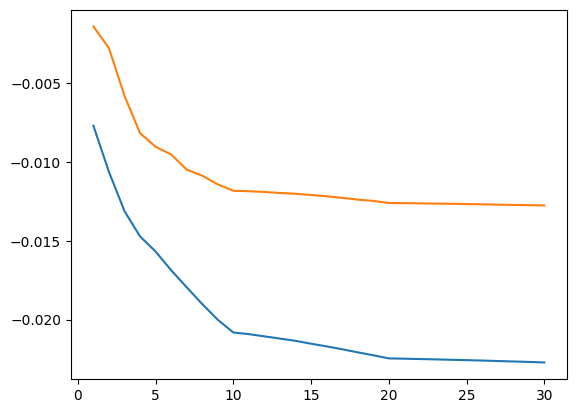

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
print(r)
print(r1)
l_r=len(r)
print(l_r)

x = np.arange(1,l_r+1,1)
#plt.xticks(x)
plot(x,r)
np.save("r_16r", r)
#plt.xticks(x)
plot(x,r1)
np.save("r1_16r", r1)

In [245]:
a_mean = np.zeros(5)
a_std = np.zeros(5)

#[0.         0.         0.93812501 0.         0.99250001]

In [254]:
a = np.array(accuracy)
print(a)
print(np.mean(a))
print(np.std(a))
#a = np.array(acc_valid)
print(a)
print(np.mean(a))
print(np.std(a))
#a_mean = np.load("acc3.npy")
a_mean = np.load("acc_r3.npy")
print(a_mean)
#print(a[15:20])
#len(a)
a_mean[4-1] = np.mean(a)
print(np.mean(a))
print(np.std(a))
print(a_mean)
#np.save("acc3", a_mean)
np.save("acc_r3", a_mean)

[0.966875 0.97     0.9675   0.969375 0.968125]
0.968375
0.0011592135
[0.966875 0.97     0.9675   0.969375 0.968125]
0.968375
0.0011592135
[0.86612499 0.89425004 0.         0.97087497 0.97749996]
0.968375
0.0011592135
[0.86612499 0.89425004 0.         0.96837503 0.97749996]


In [15]:
o_mean = np.zeros(7)
p_mean = np.zeros(7)

#o_mean = np.load("acc_o1.npy")
o_mean[4-1]=0.91449994
o_mean[5-1]= 0.93187505 
#p_mean[4-1]= 0.93812501 
print(o_mean)
#print(p_mean)

[0.         0.         0.         0.91449994 0.93187505 0.
 0.        ]


In [333]:
o_mean = np.load("acc_o1.npy")
print(o_mean)
#o_mean = np.zeros(3)
o = np.array(accuracy)
print(o)
print(np.mean(o))
o = np.array(acc_valid)
print(o)
print(np.mean(o))
#len(o)
print(np.mean(o))
o_mean[6-1] = 0.93387496   #0.91449994
print(o_mean)
np.save("acc_o1.npy", o_mean)

[0.79587501 0.86549997 0.90987504 0.94137496 0.93112499 0.94949996
 0.92949998]
[0.9525  0.95375 0.9525  0.94875 0.95375]
0.95225
[0.950625 0.943125 0.94875  0.94875  0.950625]
0.94837505
0.94837505
[0.79587501 0.86549997 0.90987504 0.94137496 0.93112499 0.93387496
 0.92949998]


In [187]:
#p_mean = np.load("acc_p1.npy")
p_mean = np.array([0.80687505, 0.90349996, 0.92162502, 0.94512498, 0.93400002, 0.95162499,
 0.93050003])
print(p_mean)
np.save("acc_p1", p_mean)

[0.80687505 0.90349996 0.92162502 0.94512498 0.93400002 0.95162499
 0.93050003]


In [332]:
p_mean = np.load("acc_p1.npy")
print(p_mean)
#len(p)
p_mean[6-1] = 0.95162499  #0.93812501
print(p_mean)
np.save("acc_p1", p_mean)

[0.80687505 0.90349996 0.92162502 0.94512498 0.92837495 0.93387496
 0.93050003]
[0.80687505 0.90349996 0.92162502 0.94512498 0.92837495 0.95162499
 0.93050003]


10


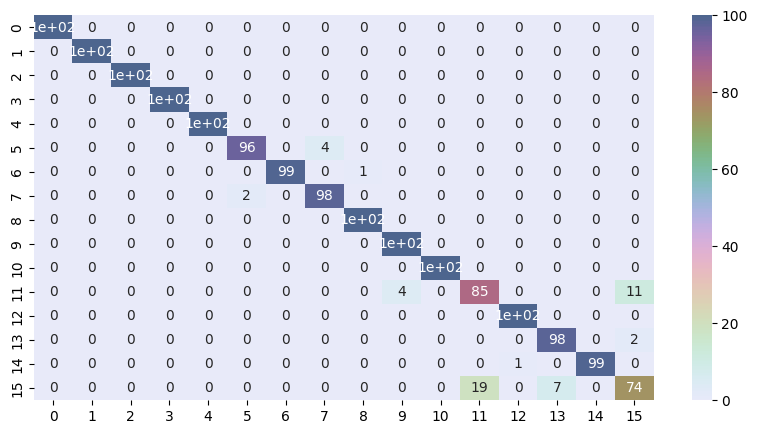

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(len(fm))
image = fm[8].detach().cpu().numpy() 
#print(image)
np.save("fm64-96.7", image)

#f=image//100
cmap = sns.cubehelix_palette(start = 1.5, rot = 2.9, gamma=0.5, as_cmap = True)
fig = plt.figure(figsize=(10,5))
sns.heatmap(image, cbar=True,annot=True, cmap=cmap)
plt.show()

4500


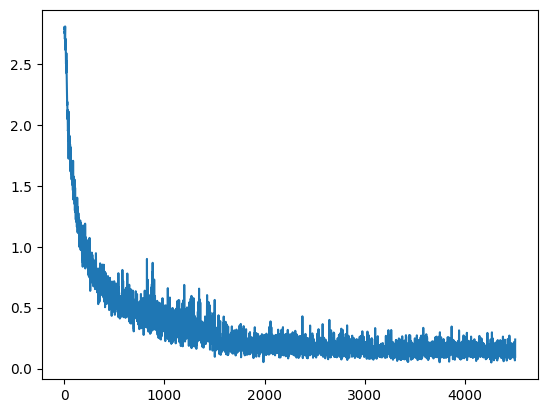

In [256]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
l_losses=len(losses)
print(l_losses)
x = np.arange(1,l_losses+1,1)
#plt.xticks(x)
plot(x,losses)
np.save("loss4r-96.7", losses)

In [75]:
torch.save(model, 'model32.pth')

10


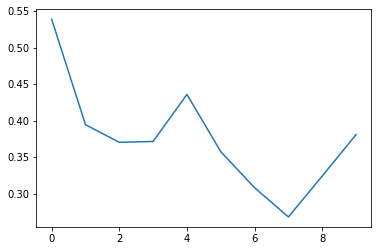

In [25]:
from matplotlib.pyplot import plot
l_losses=len(loss_test)
print(l_losses)
x = np.arange(0,l_losses,1)
plot(x,loss_test)
np.save("losse3t", loss_test)

In [39]:
print(accuracy)

[tensor(0.6473, device='cuda:0'), tensor(0.6233, device='cuda:0'), tensor(0.4942, device='cuda:0'), tensor(0.7928, device='cuda:0'), tensor(0.7783, device='cuda:0'), tensor(0.6775, device='cuda:0'), tensor(0.8304, device='cuda:0'), tensor(0.8242, device='cuda:0'), tensor(0.7306, device='cuda:0'), tensor(0.8399, device='cuda:0'), tensor(0.8324, device='cuda:0'), tensor(0.7413, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8568, device='cuda:0'), tensor(0.7742, device='cuda:0'), tensor(0.8819, device='cuda:0'), tensor(0.8786, device='cuda:0'), tensor(0.8025, device='cuda:0'), tensor(0.8896, device='cuda:0'), tensor(0.8895, device='cuda:0'), tensor(0.8168, device='cuda:0'), tensor(0.8969, device='cuda:0'), tensor(0.8981, device='cuda:0'), tensor(0.8283, device='cuda:0'), tensor(0.8618, device='cuda:0'), tensor(0.8597, device='cuda:0'), tensor(0.7722, device='cuda:0'), tensor(0.9072, device='cuda:0'), tensor(0.9073, device='cuda:0'), tensor(0.8443, device='cuda:0'), tensor(0.

In [188]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import argparse
from torchvision import models, transforms
import time
#import cv2 as cv
from torchsummary import summary
from matplotlib import pyplot

#model = SpactralNet()
#model.load_state_dict(torch.load("model.pt"))
model = torch.load('model32.pth')
device = torch.device("cpu")
model.to(device)
model.eval()

validdata = np.load( "valid32.npy" )
print(validdata.shape)
images = validdata[32:48]
print(images.shape)

b,c,s=images.shape
images = images.reshape(b//2,2,c,s).transpose(1,0,2,3).reshape(b,c,s)
print(images.shape)
#images = (images - np.mean(images)) / np.std(images)
#images = np.minimum(1, np.maximum(0, (images + 0.5)))
img=images
#plt.subplots(figsize=(12,6))
#plt.xticks([]),plt.yticks([])  #去除坐标轴
#plt.pcolor(img , cmap='jet')
#plt.colorbar()
#plt.colorbar(extend='both')
img = torch.from_numpy(np.stack(img, 0))
print(img.shape)
img = img.float()
#img = img.unsqueeze(0)

print(img.shape)
img = img.to(device)

o,out,out_tcn1,out_tcn2,out_tcn,out_att = model(img)

print(o.shape)


(64, 32, 204)
(16, 32, 204)
(16, 32, 204)
torch.Size([16, 32, 204])
torch.Size([16, 32, 204])
torch.Size([16, 16])


In [190]:
b,c,s=images.shape
#images = images.reshape(b,c,1,s)
#images = (images - np.mean(images)) / np.std(images)
#images = np.minimum(1, np.maximum(0, (images + 0.5)))
#img=images.mean(axis=1)
img=images

print(img.shape)

out = out.detach().cpu().numpy()
out_tcn1 = out_tcn1.detach().cpu().numpy()
out_tcn2 = out_tcn2.detach().cpu().numpy()
out_tcn = out_tcn.detach().cpu().numpy()
out_att = out_att.detach().cpu().numpy()

(16, 32, 204)


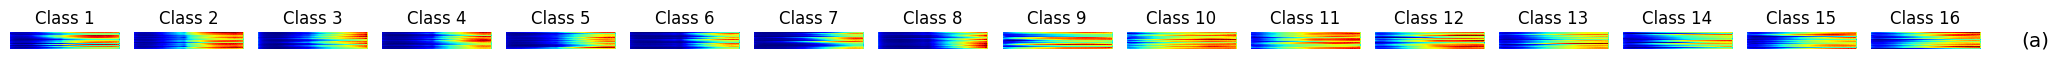

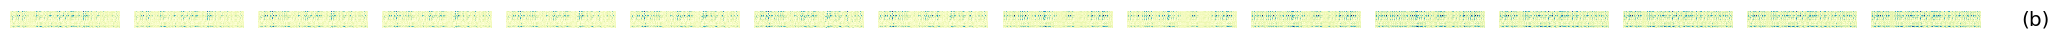

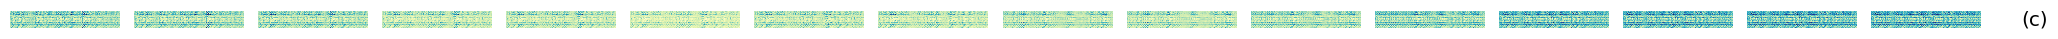

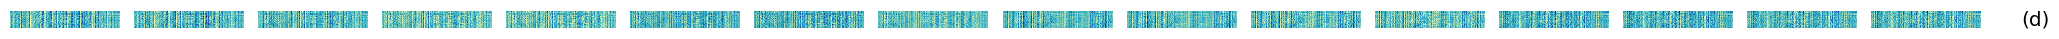

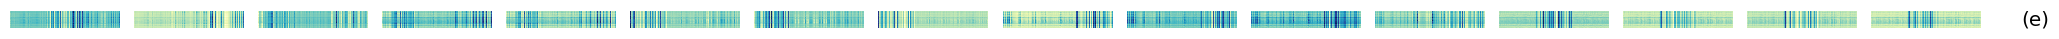

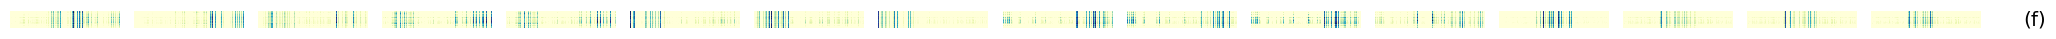

In [191]:

fig = plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.title(f"Class {i + 1}")
    plt.imshow(img[i], cmap='jet', interpolation='none')  ##interpolation='nearest'  ##aspect='auto'
    ##nipy_spectral  gist_ncar  tab20
#    plt.yticks([]) 
    plt.axis("off")
plt.suptitle("(a)", fontsize='x-large',x=1.02, y=0.485)
plt.tight_layout()
plt.show()



fig = plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.imshow(out_tcn1[i], cmap='YlGnBu', interpolation='none')
#    plt.yticks([]) 
    plt.axis("off")
plt.suptitle("(b)", fontsize='x-large',x=1.02, y=0.485)
plt.tight_layout()
plt.show()



fig = plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.imshow(out_tcn2[i], cmap='YlGnBu', interpolation='none')
#    plt.yticks([]) 
    plt.axis("off")
plt.suptitle("(c)", fontsize='x-large',x=1.02, y=0.485)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.imshow(out_tcn[i], cmap='YlGnBu', interpolation='none')
#    plt.yticks([]) 
    plt.axis("off")
plt.suptitle("(d)", fontsize='x-large',x=1.02, y=0.485)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.tight_layout()
    plt.imshow(out_att[i], cmap='YlGnBu', interpolation='none')
#    plt.yticks([]) 
    plt.axis("off")
plt.suptitle("(e)", fontsize='x-large',x=1.02, y=0.485)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,5))
for i in range(16):
    plt.subplot(1, 16, i+1)
    plt.imshow(out[i], cmap='YlGnBu', interpolation='none')
#    plt.yticks([]) 
    plt.axis("off")
plt.suptitle("(f)", fontsize='x-large',x=1.02, y=0.485)
plt.tight_layout()
plt.show()

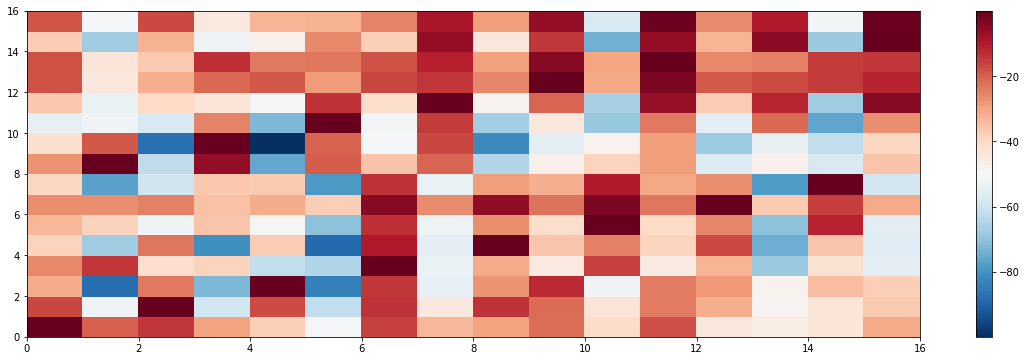

In [104]:
#images = (images - np.mean(images)) / np.std(images)
#images = np.minimum(1, np.maximum(0, (images + 0.5)))
#images = (images - images.min()) / (images.max() - images.min())
plt.subplots(figsize=(20,6))
plt.pcolor(out, cmap='RdBu_r')
plt.colorbar()